In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from pathlib import Path
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE

### Load Myopia CSV file into a dataframe

In [2]:
file_path = Path("./myopia.csv")
myopia_df = pd.read_csv(file_path)
myopia_df.head()

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY,MYOPIC
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1,0
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1,1
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0,0


In [3]:
#Remove the MYOPIC column
myopia_df = myopia_df.drop(columns=["MYOPIC"])
myopia_df

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
613,6,0.678,22.400000,3.663,3.803,14.93,2,0,7,3,14,37,1,0
614,6,0.665,22.500000,3.570,3.378,15.56,6,0,1,0,8,10,1,1
615,6,1.834,22.940001,3.624,3.424,15.89,8,0,0,0,4,4,1,1
616,6,0.665,21.920000,3.688,3.598,14.64,12,2,1,0,15,23,0,0


In [4]:
#Scale the data so that columns with larger values don't influence the outcomes more than the smaller data columns
scaler = StandardScaler()
scaled_data = scaler.fit_transform(myopia_df[['AL', 'VCD', 'SPORTHR', 'COMPHR', 'STUDYHR', 'TVHR', 'DIOPTERHR']])

#Create a new DataFrame with the transformed data
new_myopia_df = pd.DataFrame(scaled_data, columns=['AL', 'VCD', 'SPORTHR', 'COMPHR', 'STUDYHR', 'TVHR', 'DIOPTERHR'])
new_myopia_df['AGE'] = myopia_df['AGE']
new_myopia_df['SPHEQ'] = myopia_df['SPHEQ']
new_myopia_df['ACD'] = myopia_df['ACD']
new_myopia_df['LT'] = myopia_df['LT']
new_myopia_df['MOMMY'] = myopia_df['MOMMY']
new_myopia_df['DADMY'] = myopia_df['DADMY']
new_myopia_df.head()

,AL,VCD,SPORTHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,AGE,SPHEQ,ACD,LT,MOMMY,DADMY
0,-0.892861,-1.019792,4.150661,-0.689311,-0.672996,0.184058,0.498304,6,-0.052,3.690,3.498,1,1
1,-0.171840,-0.130763,-0.998898,-0.361875,-0.221409,-0.340932,-0.875088,6,0.608,3.702,3.392,1,1
2,-0.009977,0.215809,0.257092,-0.034439,-0.672996,0.184058,-0.750234,6,1.179,3.462,3.514,0,0
3,-0.436703,-0.974587,0.759488,-0.689311,-0.672996,-0.865922,0.685585,6,0.525,3.862,3.612,0,1
4,1.167204,1.180178,0.257092,-0.689311,-0.672996,-0.865922,-1.374503,5,0.697,3.676,3.454,1,0


### Apply Dimensionality Reduction

In [5]:
#Initialize PCA model
pca = PCA(n_components=0.9)

#Get principal components for the data
myopia_pca = pca.fit_transform(new_myopia_df)

myopia_pca.shape

(618, 7)

In [6]:
#Put PCA data in new dataframe
myopia_reduced_df = pd.DataFrame(data=myopia_pca, columns=["pc1","pc2","pc3", "pc4", "pc5","pc6","pc7"])

myopia_reduced_df.head()

,pc1,pc2,pc3,pc4,pc5,pc6,pc7
0,-0.114931,1.066730,3.236067,-1.849344,-1.970655,-1.456793,-0.264504
1,-1.054343,-0.592019,-0.584928,0.287819,0.458582,-0.406986,-0.296709
2,-0.523942,-0.571186,0.658271,0.261555,-0.205787,0.636579,0.219997
3,-0.836719,0.478847,0.410342,-0.677125,-0.685019,-0.601859,-0.349581
4,-0.460505,-2.500423,0.273559,-0.096333,-0.578217,0.304744,-0.999477


In [7]:
#Initialize t-SNE model
tsne = TSNE()

#Reduce the dimensions using the t-SNE model
tsne_features = tsne.fit_transform(myopia_reduced_df)

#Find the number of columns in tsne_features
tsne_features.shape

C:\AnacondaPython\envs\PythonData\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\AnacondaPython\envs\PythonData\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


(618, 2)

In [8]:
#Prepare to plot the dataset

myopia_reduced_df['x'] = tsne_features[:,0]

myopia_reduced_df['y'] = tsne_features[:,1]

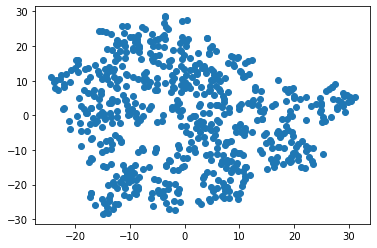

In [9]:
#Visualize the tsne_features to see if there are clusters
plt.scatter(myopia_reduced_df['x'], myopia_reduced_df['y'])

plt.show()

Note: From this visualization, it does not appear that there are easily identifiable clusters

### Perform Cluster Analysis with K-Means

C:\AnacondaPython\envs\PythonData\lib\site-packages\sklearn\cluster\_kmeans.py:1037: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  "KMeans is known to have a memory leak on Windows "


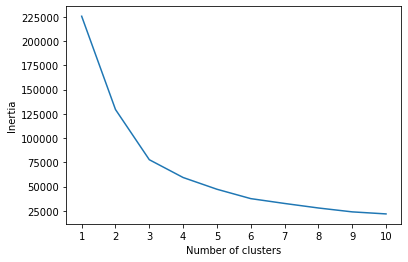

In [10]:
#Create an empty list to hold inertia values
inertia = []

#Create a list of k values to loop through
k = [1,2,3,4,5,6,7,8,9,10]

#For loop to find the best value for k
for i in k:
    k_model = KMeans(n_clusters = i, random_state=0)
    k_model.fit(myopia_reduced_df)
    inertia.append(k_model.inertia_)
    
#Create a DataFrame to plot the Elbow Curve
elbow_data = {"k": k, "inertia": inertia}
elbow_df = pd.DataFrame(elbow_data)

#Create and show the plot for the Elbow Curve
plt.plot(elbow_df['k'], elbow_df['inertia'])
plt.xticks(range(1,11))
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

Note: Based on this visual, I'm picking 4 as the inflection point

In [11]:
#Create K-Means model with 4 clusters
model = KMeans(n_clusters=4, random_state=0)

#Fit the model to the reduced data
model.fit(myopia_reduced_df)

#Get predictions based on the model
predictions = model.predict(myopia_reduced_df)

#Add new 'class' column to dataframe
myopia_reduced_df["class"] = model.labels_

myopia_reduced_df.head()

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,x,y,class
0,-0.114931,1.066730,3.236067,-1.849344,-1.970655,-1.456793,-0.264504,-22.137461,1.890090,1
1,-1.054343,-0.592019,-0.584928,0.287819,0.458582,-0.406986,-0.296709,2.087334,9.725901,3
2,-0.523942,-0.571186,0.658271,0.261555,-0.205787,0.636579,0.219997,-2.232200,1.745316,1
3,-0.836719,0.478847,0.410342,-0.677125,-0.685019,-0.601859,-0.349581,-10.632093,4.533641,1
4,-0.460505,-2.500423,0.273559,-0.096333,-0.578217,0.304744,-0.999477,4.420061,0.742390,0


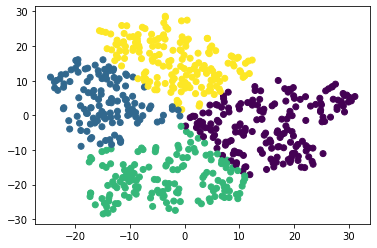

In [12]:
#Plot the data and view the potential clusters
plt.scatter(myopia_reduced_df['x'], myopia_reduced_df['y'], c=myopia_reduced_df['class'])
            
plt.show()            

#### Based on this visual of the K-Means model, it does appear that patients can be grouped into 4 clusters. There seems to be very little overlap between the clusters, so I would recommend to my supervisor that patients can indeed by grouped this way.